In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, random

import matplotlib.pyplot as plt
        
from matplotlib.ticker import MaxNLocator
import seaborn as sns
sns.set_style('whitegrid')

#from hmmlearn import hmm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load dataset
set1 = pd.read_csv('/content/drive/MyDrive/베어링 손상 예측/코드/feature extraction 결과파일/set1_timefeatures.csv') 
set1.columns = ['date'] + list(set1.columns[1:])
set1['date'] = pd.to_datetime(set1['date'])

set2 = pd.read_csv('/content/drive/MyDrive/베어링 손상 예측/코드/feature extraction 결과파일/set2_timefeatures.csv')
set2.columns = ['date'] + list(set2.columns[1:])
set2['date'] = pd.to_datetime(set2['date'])

set3 = pd.read_csv('/content/drive/MyDrive/베어링 손상 예측/코드/feature extraction 결과파일/set3_timefeatures.csv')
set3.columns = ['date'] + list(set3.columns[1:])
set3['date'] = pd.to_datetime(set3['date'])

# set date as index
set1 = set1.set_index('date')
set2 = set2.set_index('date')
set3 = set3.set_index('date')

set1.head()

,B1_a_mean,B1_a_std,B1_a_skew,B1_a_kurtosis,B1_a_entropy,B1_a_rms,B1_a_max,B1_a_p2p,B1_b_mean,B1_b_std,B1_b_skew,B1_b_kurtosis,B1_b_entropy,B1_b_rms,B1_b_max,B1_b_p2p,B2_a_mean,B2_a_std,B2_a_skew,B2_a_kurtosis,B2_a_entropy,B2_a_rms,B2_a_max,B2_a_p2p,B2_b_mean,B2_b_std,B2_b_skew,B2_b_kurtosis,B2_b_entropy,B2_b_rms,B2_b_max,B2_b_p2p,B3_a_mean,B3_a_std,B3_a_skew,B3_a_kurtosis,B3_a_entropy,B3_a_rms,B3_a_max,B3_a_p2p,B3_b_mean,B3_b_std,B3_b_skew,B3_b_kurtosis,B3_b_entropy,B3_b_rms,B3_b_max,B3_b_p2p,B4_a_mean,B4_a_std,B4_a_skew,B4_a_kurtosis,B4_a_entropy,B4_a_rms,B4_a_max,B4_a_p2p,B4_b_mean,B4_b_std,B4_b_skew,B4_b_kurtosis,B4_b_entropy,B4_b_rms,B4_b_max,B4_b_p2p
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-10-22 12:06:24,0.104148,0.081124,-0.029900,1.069800,4.802559,0.124617,0.720,1.108,0.100253,0.070651,0.220227,3.067002,4.585195,0.117496,0.701,1.265,0.107147,0.090650,-0.092182,0.209949,4.985813,0.130452,0.674,1.033,0.102004,0.077511,-0.053118,0.292501,4.864917,0.121644,0.530,0.786,0.106149,0.091465,0.034351,0.405671,5.027652,0.128888,0.496,0.896,0.108150,0.095490,-0.022286,0.777436,4.930004,0.131821,0.784,1.199,0.094803,0.060087,0.046532,0.790686,4.607008,0.109019,0.413,0.662,0.099513,0.066382,0.008208,1.808719,4.690580,0.115266,0.471,0.845
2003-10-22 12:09:13,0.103651,0.079519,-0.070118,1.161960,4.844846,0.123812,0.654,1.042,0.099854,0.069532,0.126542,2.001592,4.674025,0.116834,0.581,1.072,0.108189,0.090262,-0.101495,0.229620,5.014908,0.131490,0.645,0.936,0.102920,0.076742,-0.033070,0.291976,4.856479,0.122181,0.625,0.867,0.106661,0.091737,0.001111,0.445954,4.985830,0.129564,0.566,1.059,0.108458,0.094386,-0.028728,0.682840,5.057130,0.132052,0.576,0.993,0.095070,0.059423,0.085152,1.235094,4.590646,0.108900,0.420,0.796,0.093587,0.064747,-0.053721,1.873845,4.666142,0.109210,0.627,0.900
2003-10-22 12:14:13,0.105039,0.080220,-0.041579,0.986724,4.889311,0.125249,0.623,0.940,0.101543,0.069466,0.151147,1.969713,4.725061,0.118387,0.549,1.018,0.108543,0.090235,-0.092176,0.209276,5.014193,0.131901,0.613,0.952,0.104042,0.077100,-0.028952,0.173488,4.859437,0.123574,0.432,0.718,0.108740,0.091817,0.053031,0.389962,5.033128,0.131339,0.601,0.987,0.109875,0.094055,0.019566,0.751218,5.051882,0.133295,0.620,0.984,0.096158,0.059971,0.009628,0.925042,4.602957,0.110320,0.396,0.657,0.098299,0.065256,0.047069,1.430242,4.681037,0.113695,0.601,0.977
2003-10-22 12:19:13,0.104900,0.080828,0.005235,1.034758,4.852691,0.125200,0.598,1.055,0.101573,0.071268,0.099599,1.746190,4.750850,0.119007,0.535,1.009,0.108152,0.090277,-0.105781,0.189212,5.014909,0.131616,0.598,0.884,0.103378,0.076531,-0.050478,0.320134,4.852349,0.122750,0.483,0.727,0.108068,0.092386,-0.023744,0.262551,5.040658,0.131078,0.552,0.874,0.110010,0.096508,-0.008438,0.667691,5.040340,0.133972,0.684,1.036,0.096814,0.059918,-0.037240,0.652947,4.604434,0.111038,0.393,0.591,0.098602,0.066304,0.021169,1.378689,4.696194,0.114415,0.525,0.852
2003-10-22 12:24:13,0.104779,0.082038,-0.060123,1.110658,4.889993,0.125621,0.623,1.011,0.102181,0.072149,0.096043,1.182353,4.783104,0.119679,0.537,0.923,0.107943,0.088866,-0.091989,0.261055,4.943858,0.130780,0.725,1.074,0.102629,0.076047,-0.044402,0.341261,4.846424,0.121869,0.571,0.837,0.108454,0.091936,0.027091,0.326403,5.032258,0.131309,0.527,0.998,0.109350,0.095047,-0.024844,0.475547,5.030937,0.133282,0.623,1.055,0.096358,0.059257,0.036435,0.635987,4.594110,0.110189,0.376,0.591,0.098471,0.066281,0.008713,1.498303,4.693572,0.114260,0.522,0.871


In [ ]:
# merge a and b from bearing 1-4
set1['B1_mean'] = (set1['B1_a_mean'] + set1['B1_b_mean'])/2
set1['B1_std'] = (set1['B1_a_std'] + set1['B1_b_std'])/2
set1['B1_skew'] = (set1['B1_a_skew'] + set1['B1_b_skew'])/2
set1['B1_kurtosis'] = (set1['B1_a_kurtosis'] + set1['B1_b_kurtosis'])/2
set1['B1_entropy'] = (set1['B1_a_entropy'] + set1['B1_b_entropy'])/2
set1['B1_rms'] = (set1['B1_a_rms'] + set1['B1_b_rms'])/2
set1['B1_max'] = (set1['B1_a_max'] + set1['B1_b_max'])/2
set1['B1_p2p'] = (set1['B1_a_p2p'] + set1['B1_b_p2p'])/2

set1['B2_mean'] = (set1['B2_a_mean'] + set1['B2_b_mean'])/2
set1['B2_std'] = (set1['B2_a_std'] + set1['B2_b_std'])/2
set1['B2_skew'] = (set1['B2_a_skew'] + set1['B2_b_skew'])/2
set1['B2_kurtosis'] = (set1['B2_a_kurtosis'] + set1['B2_b_kurtosis'])/2
set1['B2_entropy'] = (set1['B2_a_entropy'] + set1['B2_b_entropy'])/2
set1['B2_rms'] = (set1['B2_a_rms'] + set1['B2_b_rms'])/2
set1['B2_max'] = (set1['B2_a_max'] + set1['B2_b_max'])/2
set1['B2_p2p'] = (set1['B2_a_p2p'] + set1['B2_b_p2p'])/2

set1['B3_mean'] = (set1['B3_a_mean'] + set1['B3_b_mean'])/2
set1['B3_std'] = (set1['B3_a_std'] + set1['B3_b_std'])/2
set1['B3_skew'] = (set1['B3_a_skew'] + set1['B3_b_skew'])/2
set1['B3_kurtosis'] = (set1['B3_a_kurtosis'] + set1['B3_b_kurtosis'])/2
set1['B3_entropy'] = (set1['B3_a_entropy'] + set1['B3_b_entropy'])/2
set1['B3_rms'] = (set1['B3_a_rms'] + set1['B3_b_rms'])/2
set1['B3_max'] = (set1['B3_a_max'] + set1['B3_b_max'])/2
set1['B3_p2p'] = (set1['B3_a_p2p'] + set1['B3_b_p2p'])/2

set1['B4_mean'] = (set1['B4_a_mean'] + set1['B4_b_mean'])/2
set1['B4_std'] = (set1['B4_a_std'] + set1['B4_b_std'])/2
set1['B4_skew'] = (set1['B4_a_skew'] + set1['B4_b_skew'])/2
set1['B4_kurtosis'] = (set1['B4_a_kurtosis'] + set1['B4_b_kurtosis'])/2
set1['B4_entropy'] = (set1['B4_a_entropy'] + set1['B4_b_entropy'])/2
set1['B4_rms'] = (set1['B4_a_rms'] + set1['B4_b_rms'])/2
set1['B4_max'] = (set1['B4_a_max'] + set1['B4_b_max'])/2
set1['B4_p2p'] = (set1['B4_a_p2p'] + set1['B4_b_p2p'])/2

set1 = set1[['B1_mean','B1_std','B1_skew','B1_kurtosis','B1_entropy','B1_rms','B1_max','B1_p2p',
             'B2_mean','B2_std','B2_skew','B2_kurtosis','B2_entropy','B2_rms','B2_max','B2_p2p',
             'B3_mean','B3_std','B3_skew','B3_kurtosis','B3_entropy','B3_rms','B3_max','B3_p2p',
             'B4_mean','B4_std','B4_skew','B4_kurtosis','B4_entropy','B4_rms','B4_max','B4_p2p']]
set1.head()

,B1_mean,B1_std,B1_skew,B1_kurtosis,B1_entropy,B1_rms,B1_max,B1_p2p,B2_mean,B2_std,B2_skew,B2_kurtosis,B2_entropy,B2_rms,B2_max,B2_p2p,B3_mean,B3_std,B3_skew,B3_kurtosis,B3_entropy,B3_rms,B3_max,B3_p2p,B4_mean,B4_std,B4_skew,B4_kurtosis,B4_entropy,B4_rms,B4_max,B4_p2p
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-10-22 12:06:24,0.102200,0.075888,0.095164,2.068401,4.693877,0.121056,0.7105,1.1865,0.104576,0.084081,-0.072650,0.251225,4.925365,0.126048,0.6020,0.9095,0.107149,0.093478,0.006032,0.591554,4.978828,0.130355,0.6400,1.0475,0.097158,0.063235,0.027370,1.299702,4.648794,0.112143,0.4420,0.7535
2003-10-22 12:09:13,0.101753,0.074526,0.028212,1.581776,4.759435,0.120323,0.6175,1.0570,0.105554,0.083502,-0.067283,0.260798,4.935694,0.126835,0.6350,0.9015,0.107560,0.093061,-0.013808,0.564397,5.021480,0.130808,0.5710,1.0260,0.094329,0.062085,0.015715,1.554470,4.628394,0.109055,0.5235,0.8480
2003-10-22 12:14:13,0.103291,0.074843,0.054784,1.478219,4.807186,0.121818,0.5860,0.9790,0.106293,0.083668,-0.060564,0.191382,4.936815,0.127737,0.5225,0.8350,0.109308,0.092936,0.036298,0.570590,5.042505,0.132317,0.6105,0.9855,0.097228,0.062613,0.028349,1.177642,4.641997,0.112008,0.4985,0.8170
2003-10-22 12:19:13,0.103237,0.076048,0.052417,1.390474,4.801771,0.122104,0.5665,1.0320,0.105765,0.083404,-0.078129,0.254673,4.933629,0.127183,0.5405,0.8055,0.109039,0.094447,-0.016091,0.465121,5.040499,0.132525,0.6180,0.9550,0.097708,0.063111,-0.008035,1.015818,4.650314,0.112727,0.4590,0.7215
2003-10-22 12:24:13,0.103480,0.077093,0.017960,1.146505,4.836549,0.122650,0.5800,0.9670,0.105286,0.082456,-0.068195,0.301158,4.895141,0.126324,0.6480,0.9555,0.108902,0.093492,0.001123,0.400975,5.031597,0.132296,0.5750,1.0265,0.097414,0.062769,0.022574,1.067145,4.643841,0.112225,0.4490,0.7310


In [ ]:
set1_B1 = set1.iloc[:,0:8]
set1_B2 = set1.iloc[:,8:16]
set1_B3 = set1.iloc[:,16:24]
set1_B4 = set1.iloc[:,24:]
set1_B1.head()
set1_B2.head()
set1_B3.head()
set1_B4.head()

,B4_mean,B4_std,B4_skew,B4_kurtosis,B4_entropy,B4_rms,B4_max,B4_p2p
date,,,,,,,,
2003-10-22 12:06:24,0.097158,0.063235,0.027370,1.299702,4.648794,0.112143,0.4420,0.7535
2003-10-22 12:09:13,0.094329,0.062085,0.015715,1.554470,4.628394,0.109055,0.5235,0.8480
2003-10-22 12:14:13,0.097228,0.062613,0.028349,1.177642,4.641997,0.112008,0.4985,0.8170
2003-10-22 12:19:13,0.097708,0.063111,-0.008035,1.015818,4.650314,0.112727,0.4590,0.7215
2003-10-22 12:24:13,0.097414,0.062769,0.022574,1.067145,4.643841,0.112225,0.4490,0.7310


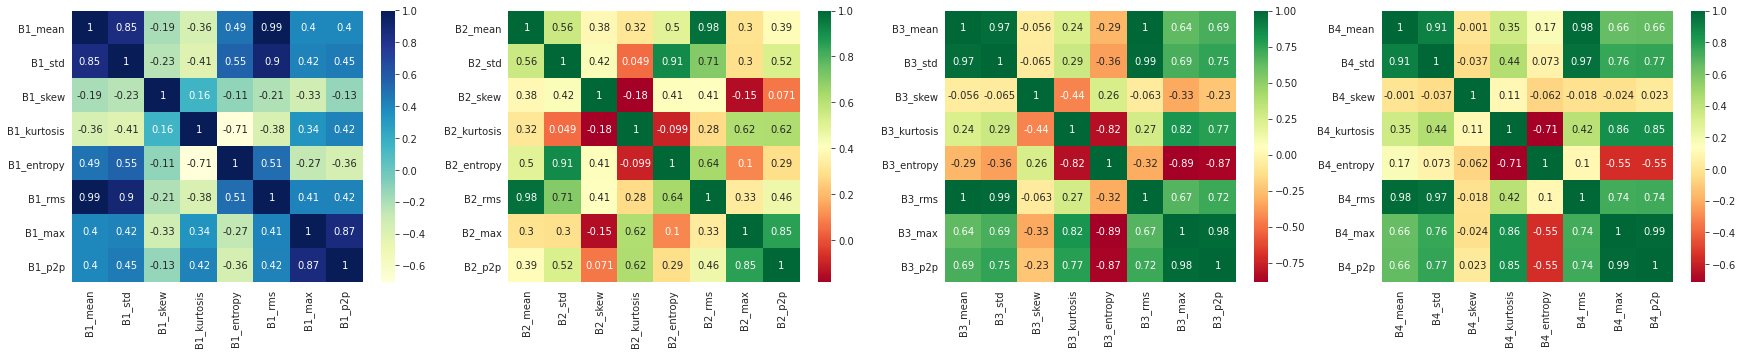

In [ ]:
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
#correlation 뽑기
corrmat1 = set1_B1.corr()
top_corr_features1 = corrmat1.index
corrmat2 = set1_B2.corr()
top_corr_features2 = corrmat2.index
corrmat3 = set1_B3.corr()
top_corr_features3 = corrmat3.index
corrmat4 = set1_B4.corr()
top_corr_features4 = corrmat4.index

#sublpot 그리기
f,(ax1,ax2,ax3, ax4) = plt.subplots(1,4,figsize=(30,5))
#plot heat map
g1=sns.heatmap(set1_B1[top_corr_features1].corr(),annot=True,cmap="YlGnBu",ax=ax1)
g1=sns.heatmap(set1_B2[top_corr_features2].corr(),annot=True,cmap="RdYlGn",ax=ax2)
g1=sns.heatmap(set1_B3[top_corr_features3].corr(),annot=True,cmap="RdYlGn",ax=ax3)
g1=sns.heatmap(set1_B4[top_corr_features4].corr(),annot=True,cmap="RdYlGn",ax=ax4)

plt.show()


# Prepare data

- Testing: Set test 3 bearing 3
    - 'S3_B3'
- Learning: 11 sensor data from each set test
    - 'S1_B1','S1_B2','S1_B3','S1_B4',
    - 'S2_B1','S2_B2','S2_B3','S2_B4',
    - 'S3_B1','S3_B2','S3_B4'

In [ ]:
#svm



In [ ]:
#sldm



In [ ]:
cols = ['B1_mean','B1_rms','B1_skew','B1_kurtosis', 
        'B2_mean','B2_rms','B2_skew','B2_kurtosis',
        'B3_mean','B3_rms','B3_skew','B3_kurtosis',
        'B4_mean','B4_rms','B4_skew','B4_kurtosis',]
set1 = set1[cols]
set2 = set2[cols]
set3 = set3[cols]